In [4]:
!pip install -q -U keras-tuner
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import kerastuner as kt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [5]:
#Read csv file from local system
from google.colab import files
files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


{'Churn_Modelling.csv': b"RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited\r\n1,15634602,Hargrave,619,France,Female,42,2,0,1,1,1,101348.88,1\r\n2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0\r\n3,15619304,Onio,502,France,Female,42,8,159660.8,3,1,0,113931.57,1\r\n4,15701354,Boni,699,France,Female,39,1,0,2,0,0,93826.63,0\r\n5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.1,0\r\n6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1\r\n7,15592531,Bartlett,822,France,Male,50,7,0,2,1,1,10062.8,0\r\n8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1\r\n9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.5,0\r\n10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0\r\n11,15767821,Bearce,528,France,Male,31,6,102016.72,2,0,0,80181.12,0\r\n12,15737173,Andrews,497,Spain,Male,24,3,0,2,1,0,76390.01,0\r\n13,15632264,Kay,476,France,Female,

In [6]:
import pandas as pd

In [7]:
#read csv files
df=pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df.shape

(10000, 14)

In [9]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [11]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
data=df.copy()

In [13]:
data.drop(['CustomerId', 'Surname'], axis=1, inplace=True)

In [14]:
data.isna().sum().sort_values(ascending=False)

Exited             0
EstimatedSalary    0
IsActiveMember     0
HasCrCard          0
NumOfProducts      0
Balance            0
Tenure             0
Age                0
Gender             0
Geography          0
CreditScore        0
RowNumber          0
dtype: int64

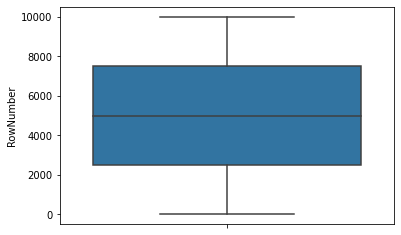

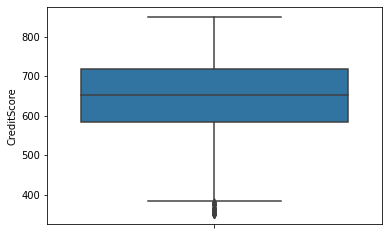

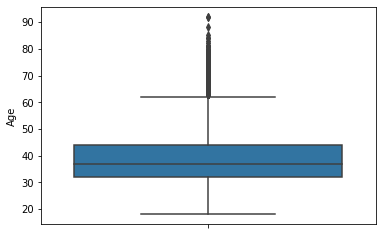

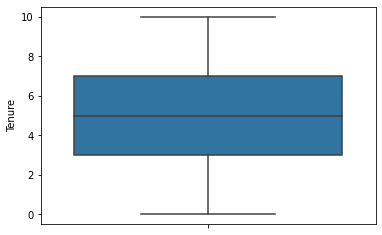

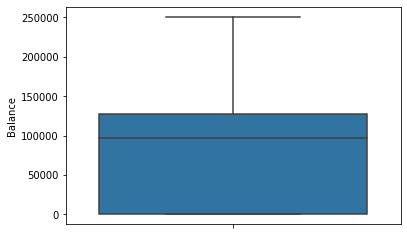

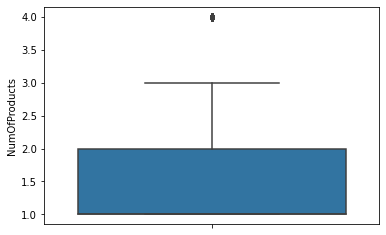

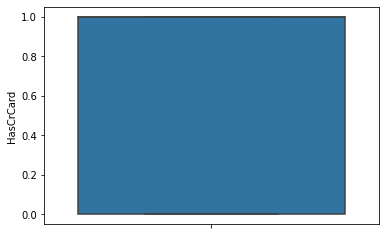

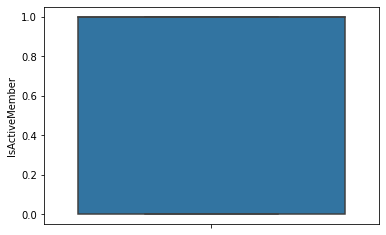

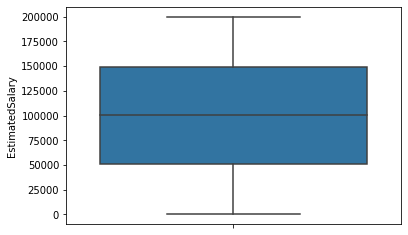

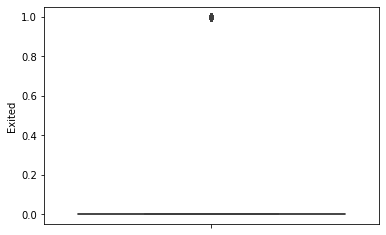

In [15]:
for x in data.columns:
  if data[x].dtypes != 'object':
    sns.boxplot(y=data[x])
    plt.show()

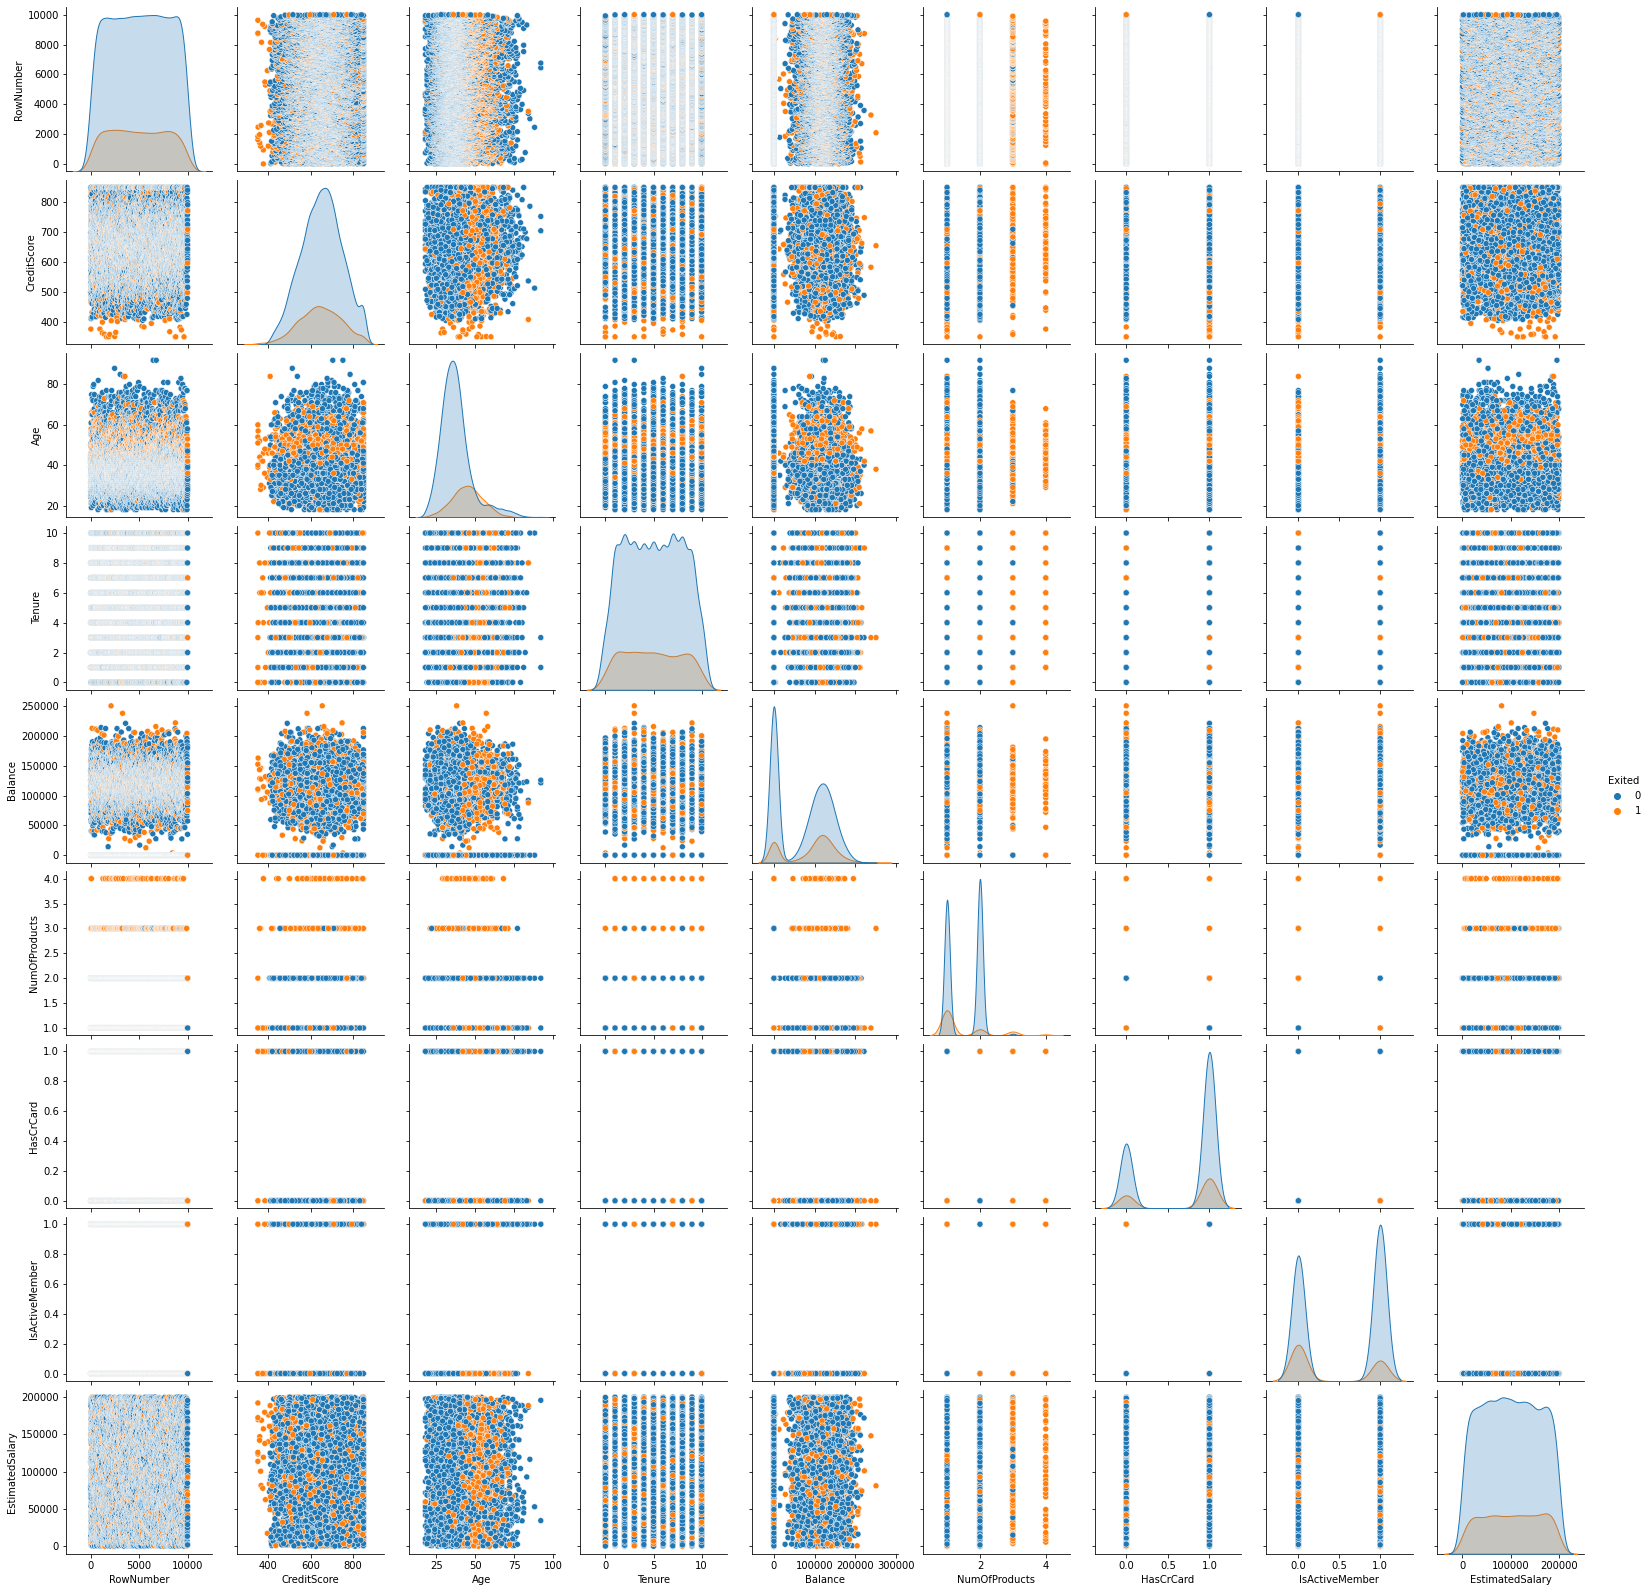

In [16]:
import seaborn as sns
sns.pairplot(data,hue="Exited")

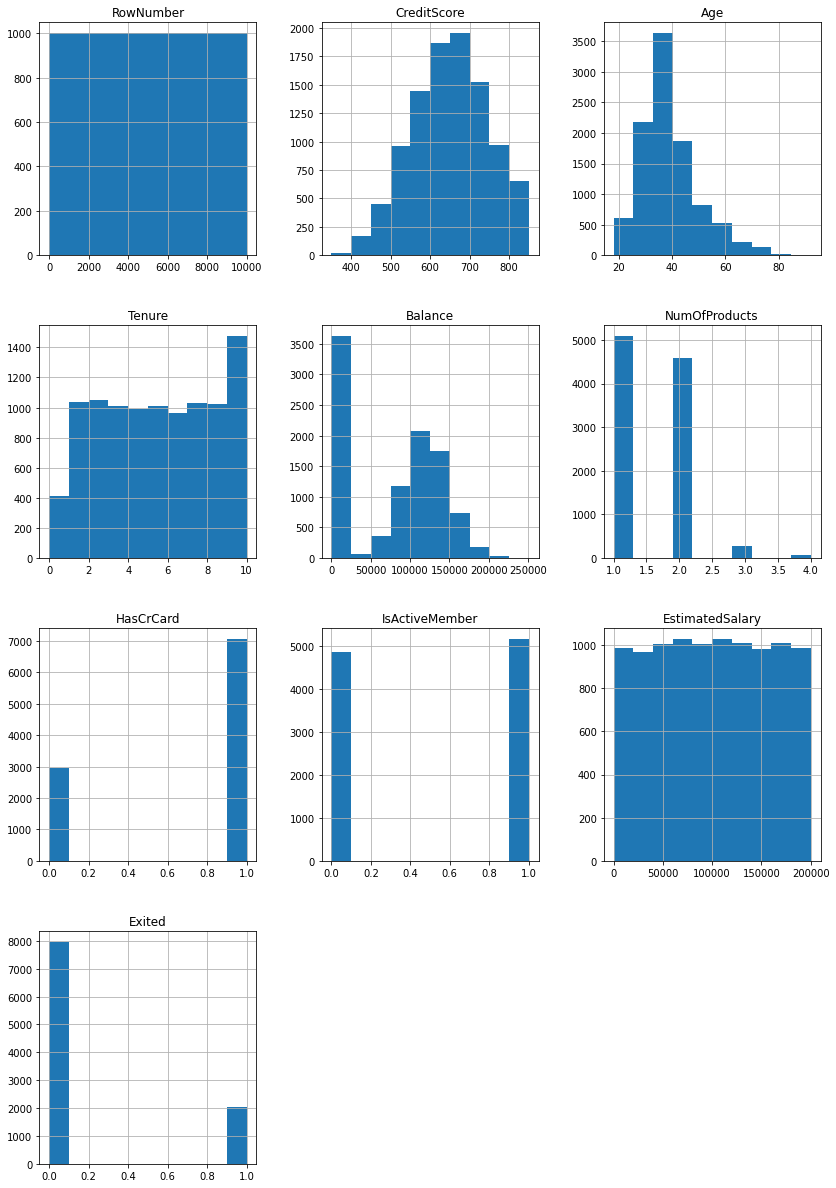

In [17]:
%matplotlib inline
data.hist(figsize=(14,21))
plt.show()

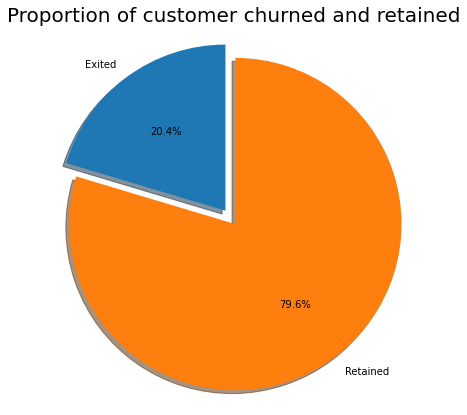

In [18]:
labels = 'Exited', 'Retained'
sizes = [data.Exited[data['Exited']==1].count(), data.Exited[data['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()



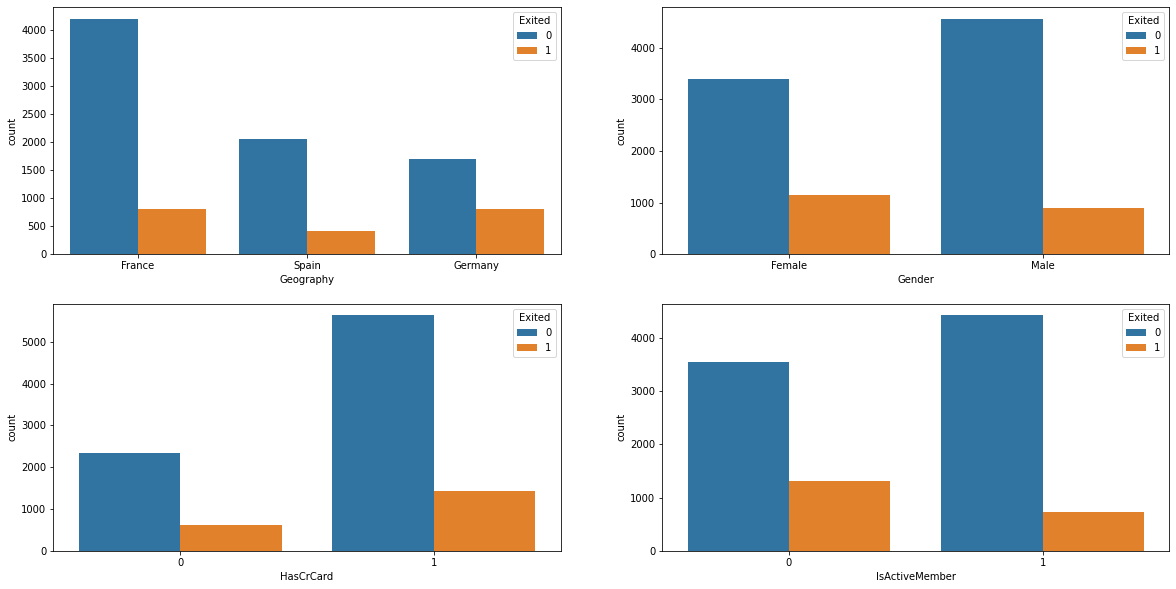

In [19]:
fig, axarr = plt.subplots(2, 2, figsize=(20,10))
sns.countplot(x='Geography', hue = 'Exited',data = data, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = data, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = data, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = data, ax=axarr[1][1])

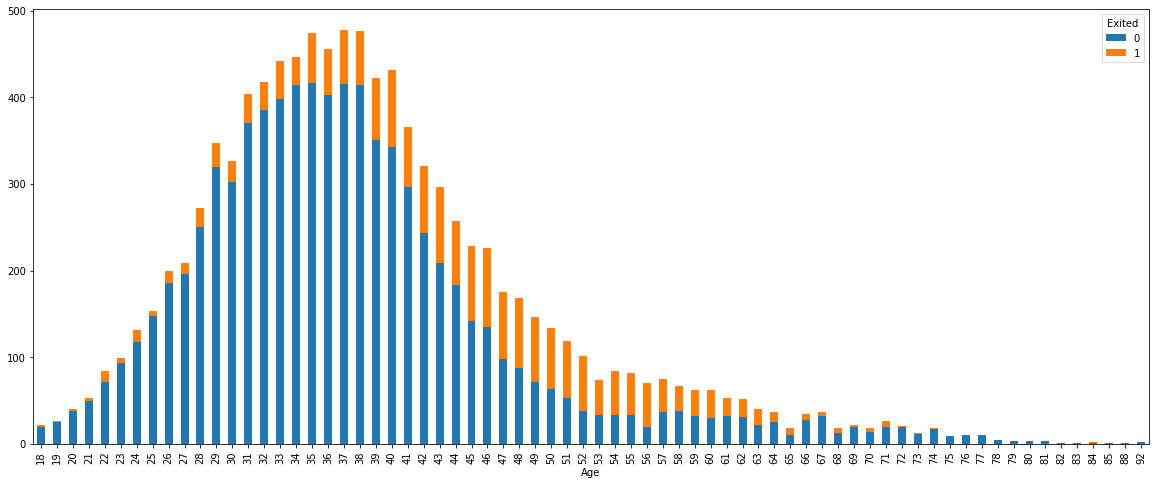

In [20]:
pd.crosstab(data['Age'], data['Exited']).plot(kind='bar', stacked=True, figsize=(20,8))

Text(0.5, 1.0, 'CHURN vs NUMBER OF PRODUCTS TAKEN')

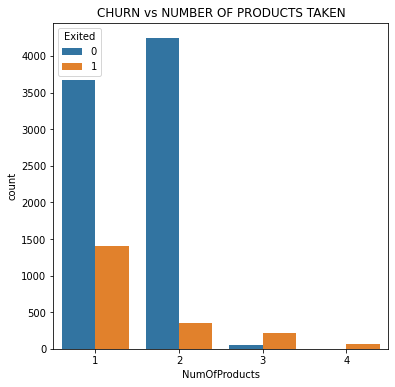

In [21]:
plt.figure(figsize=(6,6))
sns.countplot(x='NumOfProducts', hue='Exited', data=data)
plt.title('CHURN vs NUMBER OF PRODUCTS TAKEN')

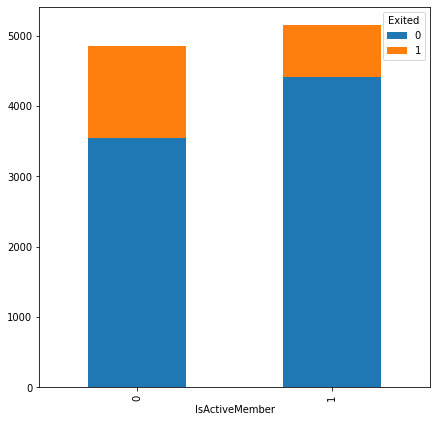

In [22]:
pd.crosstab(data['IsActiveMember'], data['Exited']).plot(kind='bar', stacked=True, figsize=(7,7))

In [23]:
colname=[]
for x in data.columns:
  if data[x].dtypes == 'object':
    colname.append(x)
colname

['Geography', 'Gender']

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in colname:
  data[x] = le.fit_transform(data[x])

In [25]:
data.dtypes

RowNumber            int64
CreditScore          int64
Geography            int64
Gender               int64
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [26]:
data["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [27]:
X = data.drop("Exited",axis=1)
Y = data["Exited"]

In [28]:
from collections import Counter
from imblearn.over_sampling import SMOTE
counter = Counter(Y)
print('Before',counter)
# oversampling the train dataset using SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, Y)
counter = Counter(y_sm)
print('After',counter)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Before Counter({0: 7963, 1: 2037})
After Counter({1: 7963, 0: 7963})


In [29]:
X_sm.shape

(15926, 11)

In [30]:
y_sm.shape

(15926,)

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

In [32]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [33]:
from tensorflow import keras
from tensorflow.keras import layers
from kerastuner.tuners import RandomSearch

In [34]:
#user defined function to create model
def build_model(hp):
  model = keras.Sequential()
  for i in range(hp.Int('num_layers', 2, 20)):
    model.add(layers.Dense(units=hp.Int('units_' + str(i), # choose neurons in each layers between 32 to 512 with 32 step size
min_value=32,
max_value=512,
step=32),
activation='relu'))
  model.add(layers.Dense(1, activation="sigmoid"))
  model.compile(
optimizer=keras.optimizers.Adam(
hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])), # choose learning rates
loss='binary_crossentropy',
metrics=['accuracy'])
  return model

In [35]:
# search for best hyperparameters
tuner = kt.RandomSearch(
build_model,
objective='val_accuracy',
max_trials=5,
executions_per_trial=3,
directory='project_1',
project_name='Churn_prediction_1')

In [36]:
# search for best hyperparameters
tuner.search(X_train, y_train,
epochs=5,
validation_data=(X_test, y_test))

Trial 5 Complete [00h 01m 53s]
val_accuracy: 0.8543628255526224

Best val_accuracy So Far: 0.8543628255526224
Total elapsed time: 00h 06m 30s
INFO:tensorflow:Oracle triggered exit


In [37]:
# best hyperparameters
tuner.results_summary()

Results summary
Results in project_1/Churn_prediction_1
Showing 10 best trials
Objective(name='val_accuracy', direction='max')
Trial summary
Hyperparameters:
num_layers: 11
units_0: 320
units_1: 320
learning_rate: 0.001
units_2: 448
units_3: 480
units_4: 96
units_5: 224
units_6: 288
units_7: 32
units_8: 96
units_9: 448
units_10: 352
units_11: 320
units_12: 192
units_13: 192
units_14: 448
units_15: 160
units_16: 384
units_17: 480
units_18: 160
Score: 0.8543628255526224
Trial summary
Hyperparameters:
num_layers: 5
units_0: 288
units_1: 416
learning_rate: 0.01
units_2: 320
units_3: 448
units_4: 256
units_5: 128
units_6: 384
units_7: 64
units_8: 224
units_9: 320
units_10: 128
units_11: 32
units_12: 384
units_13: 32
units_14: 480
units_15: 32
units_16: 160
units_17: 128
units_18: 416
Score: 0.8446327646573385
Trial summary
Hyperparameters:
num_layers: 5
units_0: 224
units_1: 32
learning_rate: 0.0001
units_2: 480
units_3: 480
units_4: 96
units_5: 320
units_6: 224
units_7: 480
units_8: 480
un

In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [45]:
# Selecting best hyperparameter and creating model
model = Sequential()
model.add(Dense(256, activation="relu", input_dim=11))
model.add(Dense(384, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(256, activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(160, activation="relu"))
model.add(Dense(480, activation="relu"))
model.add(Dense(384, activation="relu"))
model.add(Dense(288, activation="relu"))
model.add(Dense(128, activation="relu"))
model.add(Dense(160, activation="relu"))
model.add(Dense(320, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [47]:
# summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 256)               3072      
_________________________________________________________________
dense_31 (Dense)             (None, 384)               98688     
_________________________________________________________________
dense_32 (Dense)             (None, 256)               98560     
_________________________________________________________________
dense_33 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_34 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_35 (Dense)             (None, 512)               131584    
_________________________________________________________________
dense_36 (Dense)             (None, 160)              

In [48]:
# selecting learning rate
adam= tf.keras.optimizers.Adam(learning_rate=0.0001)

In [49]:
model.compile(optimizer=adam,loss='binary_crossentropy')

In [52]:
trained_model = model.fit(X_train, y_train, epochs=10,batch_size=50)

Epoch 1/10
255/255 [==============================] - 4s 17ms/step - loss: 0.1541
Epoch 2/10
255/255 [==============================] - 4s 17ms/step - loss: 0.1417
Epoch 3/10
255/255 [==============================] - 4s 17ms/step - loss: 0.1318
Epoch 4/10
255/255 [==============================] - 4s 17ms/step - loss: 0.1258
Epoch 5/10
255/255 [==============================] - 5s 18ms/step - loss: 0.1102
Epoch 6/10
255/255 [==============================] - 4s 17ms/step - loss: 0.1030
Epoch 7/10
255/255 [==============================] - 4s 17ms/step - loss: 0.1015
Epoch 8/10
255/255 [==============================] - 4s 17ms/step - loss: 0.0907
Epoch 9/10
255/255 [==============================] - 4s 17ms/step - loss: 0.0837
Epoch 10/10
255/255 [==============================] - 4s 17ms/step - loss: 0.0775


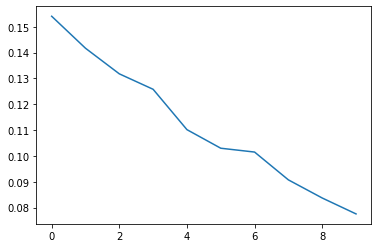

In [53]:
plt.plot(trained_model.history["loss"])

In [54]:
y_pred = model.predict(X_test)
y_pred = np.where(y_pred >= 0.5,1,0)

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.84      0.87      1593
           1       0.85      0.92      0.88      1593

    accuracy                           0.88      3186
   macro avg       0.88      0.88      0.88      3186
weighted avg       0.88      0.88      0.88      3186

